# Exercise 5


1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

Your submission should be your Jupyter notebook, keep it short and concise.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('./agaricus-lepiota.data',  thousands=',').dropna()

In [5]:
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
smelly = pd.crosstab(df['habitat'], df['odor'])
smelly

odor,a,c,f,l,m,n,p,s,y
habitat,,,,,,,,,
d,48,192,624,48,36,1816,0,192,192
g,176,0,576,176,0,1092,128,0,0
l,0,0,192,0,0,256,0,192,192
m,128,0,0,128,0,36,0,0,0
p,48,0,624,48,0,40,0,192,192
u,0,0,144,0,0,96,128,0,0
w,0,0,0,0,0,192,0,0,0


### Hva lukter sopp på forskjellige steder?
Visualisert!


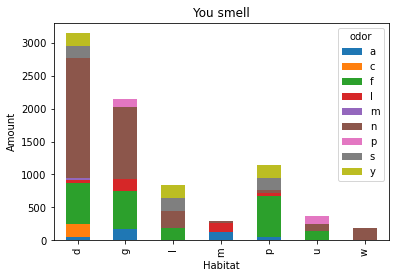

In [19]:
smelly.plot(kind='bar', stacked=True)
plt.title('You smell')
plt.ylabel('Amount')
plt.xlabel('Habitat')
plt.show()

## Feature til dummy

In [24]:
dummy = pd.get_dummies(df, drop_first=True)
dummy.head()

,edibility_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Visualizing the Feature Space

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(dummy)
indices = np.argsort(df.edibility)

vectors.shape

(96, 77)

In [59]:
plt.spy(vectors[indices][dummy.target[indices]==0], markersize=0.01)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.plot()
plt.show()

IndexError: index (8123) out of range

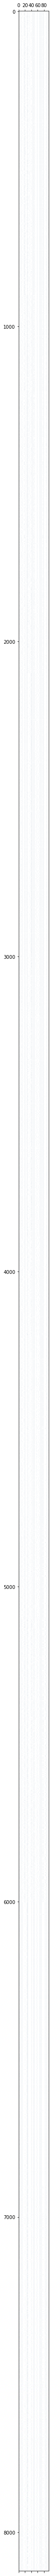

In [51]:
plt.spy(dummy, markersize=0.01)
fig = plt.gcf()
fig.set_size_inches(60,100)
plt.plot()
plt.show()

In [60]:
scatter_matrix(df)

NameError: name 'scatter_matrix' is not defined